For this project data was collected from a Minecraft server and consists of two datasets. One is information about the player and the second is data of the sessions played. Below is the number of observation in each data table and the number of variables.
| number of observations | number of variables |
| :-----:|:----:|
|196|7|
|1535|5|

Here are the variables of both data sets along with some summary statistics, both share the hashed email variable
| Name | Type | mean|median|mode|
|---|---|---|---|---|
| experience | chr|N/A|N/A|Amateur|
| subscribe| lgl|N/A|N/A|TRUE|
|hashedEmail|chr|N/A|N/A|N/A|
|played_hours|dbl|5.84|0.1|0|
|name|chr|N/A|N/A|N/A|
|gender|chr|N/A|N/A|Male|
|Age|dbl|20.5|19|17|
|start_time|chr|N/A|N/A|N/A|
|end_time|chr|N/A|N/A|N/A|
|original_start_time|dbl|1.719201e+12|1.7192e+12|1.72189e+12|
|original_end_time|dbl|1.719196e+12|1.71918e+12|1.72189e+12|

The variables are explained as folllows: experience is the self-rated background of the participant in Minecraft. The subscribe variable is whether or not the player subscribes to the newsletter. The hashed email represents the email address of a user. The playing hours are the playtime of the participant. Name, gender, and age are the values selected by the player. The start and end time is the date and time when the player started and ended their session. The original start time and end time are the Unix time of the beginning and end of the play session.

The research question I pose is, can age and play time predict the self-rated experience of the player in the player dataset? The data set offers age, play time, and the experience of the player, so after selecting for age and experience, these variables and using a KNN classification model can help us predict the experience of the player.

Now we will load the data onto the notebook.


In [57]:
library(tidyverse)

In [59]:
player <- read_csv("https://raw.githubusercontent.com/kwok-c/individual/refs/heads/main/players.csv")
session <- read_csv("https://raw.githubusercontent.com/kwok-c/individual/refs/heads/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The data is loaded and already tidy. The mean of the qualitative variables in the player dataset is calculated below.


In [83]:
mean_player <- player |>
select(played_hours, Age)|>
map_dfr(mean, na.rm=T)
mean_player

played_hours,Age
<dbl>,<dbl>
5.845918,20.52062


Now a graph will be made to visualize the data of the player dataset.

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


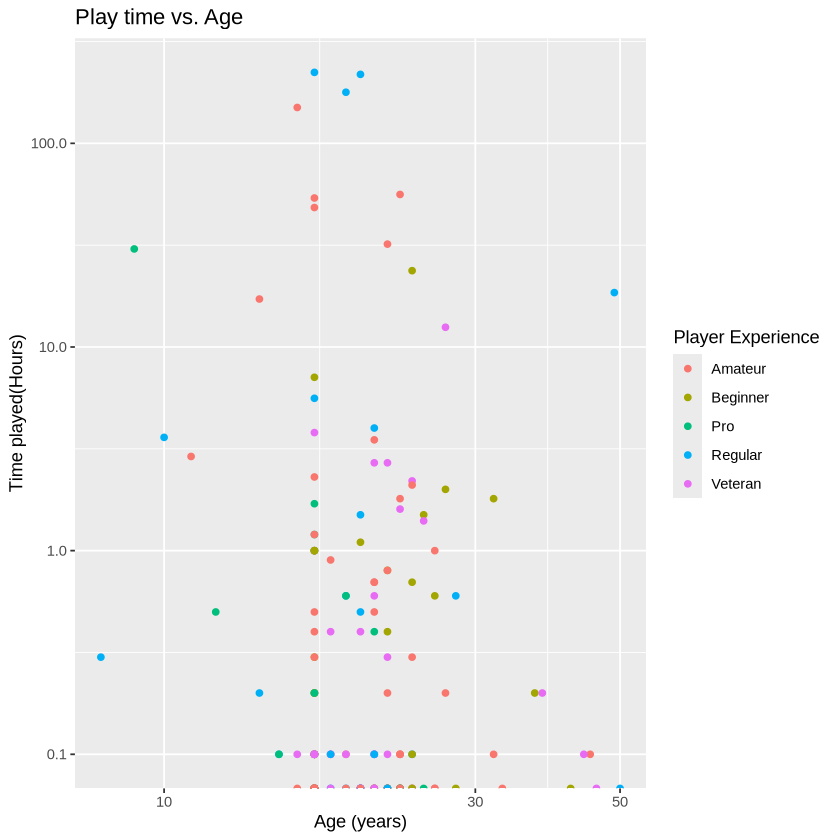

In [53]:
plot <- ggplot(player,aes(x=Age, y=played_hours))+
geom_point(aes(color=experience))+
labs(x="Age (years)", y="Time played(Hours)", color="Player Experience")+
scale_x_log10() +
scale_y_log10()+
ggtitle("Play time vs. Age")
plot

One method to answer this question is to use a simple k-nearest neighbor classification model to predict the experience level of the player. This method was chosen because we have a small data set of only 196 players, and KNN will allow us to classify them appropriately based on age and time played. For this method, we assume to predict a value based on the most frequent class of the nearest k values. This is limiting if there is a large number of a certain experience level. For example, if a small number of players have the experience level of Regular, it will likely never get predicted. Additionally, choosing the best k value will need to be done to get the best model. To do this, we can create a training model and use cross-validation to determine the best k value to use. To train the model, we will split the data into 75% training and 25% testing data and perform a 5-fold cross-validation on the training data to train the model. The data collected from the training data will determine the best k value, which will be tested using the training data to determine the strength of our model.

